In [1]:
import os
import pickle
import numpy as np
import yaml
from tqdm import tqdm
from PIL import Image
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import torch
device = torch.device('cuda')
%matplotlib inline

# Downloading the dataset and cloning the repo

In [2]:
!git clone https://github.com/artsiom-saladukha/ProjectR3GAN.git

Cloning into 'ProjectR3GAN'...
remote: Enumerating objects: 84, done.
remote: Counting objects: 100% (84/84), done.
remote: Compressing objects: 100% (71/71), done.
remote: Total 84 (delta 23), reused 70 (delta 13), pack-reused 0 (from 0)
Receiving objects: 100% (84/84), 24.67 MiB | 15.31 MiB/s, done.
Resolving deltas: 100% (23/23), done.


In [3]:
!curl -L "https://huggingface.co/brownvc/R3GAN-CIFAR10/resolve/main/network-snapshot-final.pkl" --output "ProjectR3GAN/cifar10.pkl"
!curl -L "https://huggingface.co/brownvc/R3GAN-FFHQ-64x64/resolve/main/network-snapshot-final.pkl" --output "ProjectR3GAN/ffhq-64x64.pkl"
!curl -L "https://huggingface.co/brownvc/R3GAN-FFHQ-256x256/resolve/main/network-snapshot-final.pkl" --output "ProjectR3GAN/ffhq-256x256.pkl"
!curl -L "https://huggingface.co/brownvc/R3GAN-ImgNet-32x32/resolve/main/ImageNet-32x32.pkl" --output "ProjectR3GAN/imgnet-32x32.pkl"
!curl -L "https://huggingface.co/brownvc/R3GAN-ImgNet-64x64/resolve/main/network-snapshot-final.pkl" --output "ProjectR3GAN/imgnet-64x64.pkl"

!curl -L "https://raw.githubusercontent.com/NVlabs/stylegan3/refs/heads/main/environment.yml" --output "ProjectR3GAN/environment.yml"

!wget -c https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz -P ./datasets/
!mkdir "./datasets/cifar-10"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1130  100  1130    0     0   2567      0 --:--:-- --:--:-- --:--:--  2562
100  560M  100  560M    0     0  80.7M      0  0:00:06  0:00:06 --:--:-- 58.7M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1128  100  1128    0     0   6779      0 --:--:-- --:--:-- --:--:--  6795
100  598M  100  598M    0     0  73.0M      0  0:00:08  0:00:08 --:--:-- 77.7M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1134  100  1134    0     0   6967      0 --:--:-- --:--:-- --:--:--  7000
100  615M  100  615M    0     0  78.3M      0  0:00:07  0:00:07 --:--:-- 82.0M
  % Total    % Received % Xferd  Average Speed   Tim

In [4]:
!tar -xzf "./datasets/cifar-10-python.tar.gz"

In [5]:
def save_images(data, filenames, output_dir):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    for i in tqdm(range(len(filenames))):
        img = data[i]
        img = img.reshape(3, 32, 32).transpose(1, 2, 0)
        img = Image.fromarray(np.uint8(img))
        # print(output_dir, filenames[i].decode('utf-8'))
        img.save(os.path.join(output_dir, filenames[i].decode('utf-8')))


data_batches = ['data_batch_1',
                'data_batch_2',
                'data_batch_3',
                'data_batch_4',
                'data_batch_5']
output_dir = './datasets/cifar-10/'
all_data = []
all_filenames = []

for batch in data_batches:
    with open(os.path.join('./cifar-10-batches-py/', batch), 'rb') as f:
        data = pickle.load(f, encoding='bytes')
    all_data.append(data[b'data'])
    all_filenames.extend(data[b'filenames'])

all_data = np.vstack(all_data)
save_images(all_data, all_filenames, output_dir)

100%|██████████| 50000/50000 [00:18<00:00, 2721.65it/s]


In [6]:
!zip -r "./datasets/cifar-10.zip" "./datasets/cifar-10/"

Streaming output truncated to the last 5000 lines.
  adding: datasets/cifar-10/mule_deer_s_001521.png (stored 0%)
  adding: datasets/cifar-10/fire_truck_s_002256.png (stored 0%)
  adding: datasets/cifar-10/lark_s_000771.png (stored 0%)
  adding: datasets/cifar-10/felis_domesticus_s_000028.png (stored 0%)
  adding: datasets/cifar-10/stealth_bomber_s_001032.png (stored 0%)
  adding: datasets/cifar-10/deer_s_001591.png (stored 0%)
  adding: datasets/cifar-10/emu_s_002455.png (stored 0%)
  adding: datasets/cifar-10/tabby_s_002129.png (stored 0%)
  adding: datasets/cifar-10/passenger_ship_s_001047.png (stored 0%)
  adding: datasets/cifar-10/tomcat_s_002227.png (stored 0%)
  adding: datasets/cifar-10/japanese_spaniel_s_001098.png (stored 0%)
  adding: datasets/cifar-10/bufo_bufo_s_000582.png (stored 0%)
  adding: datasets/cifar-10/coupe_s_002093.png (stored 0%)
  adding: datasets/cifar-10/fire_truck_s_001091.png (stored 0%)
  adding: datasets/cifar-10/jumbojet_s_000288.png (stored 0%)
  addi

# Installing required dependencies

In [7]:
with open('/content/ProjectR3GAN/environment.yml') as file_handle:
    environment_data = yaml.safe_load(file_handle)

for dependency in environment_data['dependencies']:
    if isinstance(dependency, dict):
      for lib in dependency['pip']:
        os.system(f'pip install {lib}')

In [8]:
!pip install Ninja

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 422.8/422.8 kB 10.2 MB/s eta 0:00:00


# Generating images from pretrained models

In [9]:
!python ProjectR3GAN/gen_images.py --seeds=0-63 --outdir=out_cifar --class=0 --network="ProjectR3GAN/cifar10.pkl"

Loading networks from "ProjectR3GAN/cifar10.pkl"...
Generating image for seed 0 (0/64) ...
Setting up PyTorch plugin "bias_act_plugin"... /usr/local/lib/python3.11/dist-packages/torch/utils/cpp_extension.py:2059: UserWarning: TORCH_CUDA_ARCH_LIST is not set, all archs for visible cards are included for compilation. 
If this is not desired, please set os.environ['TORCH_CUDA_ARCH_LIST'].
  warnings.warn(
Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... /usr/local/lib/python3.11/dist-packages/torch/utils/cpp_extension.py:2059: UserWarning: TORCH_CUDA_ARCH_LIST is not set, all archs for visible cards are included for compilation. 
If this is not desired, please set os.environ['TORCH_CUDA_ARCH_LIST'].
  warnings.warn(
Done.
Generating image for seed 1 (1/64) ...
Generating image for seed 2 (2/64) ...
Generating image for seed 3 (3/64) ...
Generating image for seed 4 (4/64) ...
Generating image for seed 5 (5/64) ...
Generating image for seed 6 (6/64) ...
Generating image for seed 7 (7/6

In [10]:
!zip -r out_cifar.zip out_cifar/

  adding: out_cifar/ (stored 0%)
  adding: out_cifar/seed0025.png (stored 0%)
  adding: out_cifar/seed0039.png (stored 0%)
  adding: out_cifar/seed0041.png (stored 0%)
  adding: out_cifar/seed0033.png (stored 0%)
  adding: out_cifar/seed0023.png (stored 0%)
  adding: out_cifar/seed0035.png (stored 0%)
  adding: out_cifar/seed0054.png (stored 0%)
  adding: out_cifar/seed0047.png (stored 0%)
  adding: out_cifar/seed0045.png (stored 0%)
  adding: out_cifar/seed0026.png (stored 0%)
  adding: out_cifar/seed0027.png (stored 0%)
  adding: out_cifar/seed0042.png (stored 0%)
  adding: out_cifar/seed0058.png (stored 0%)
  adding: out_cifar/seed0024.png (stored 0%)
  adding: out_cifar/seed0055.png (stored 0%)
  adding: out_cifar/seed0044.png (stored 0%)
  adding: out_cifar/seed0015.png (stored 0%)
  adding: out_cifar/seed0060.png (stored 0%)
  adding: out_cifar/seed0037.png (stored 0%)
  adding: out_cifar/seed0031.png (stored 0%)
  adding: out_cifar/seed0059.png (stored 0%)
  adding: out_cifar/se

In [36]:
!python ProjectR3GAN/gen_images.py --seeds=64-128 --outdir=out_cifar_our --class=0 --network="cifar10_our.pkl"

Loading networks from "cifar10_our.pkl"...
Generating image for seed 64 (0/65) ...
Setting up PyTorch plugin "bias_act_plugin"... /usr/local/lib/python3.11/dist-packages/torch/utils/cpp_extension.py:2059: UserWarning: TORCH_CUDA_ARCH_LIST is not set, all archs for visible cards are included for compilation. 
If this is not desired, please set os.environ['TORCH_CUDA_ARCH_LIST'].
  warnings.warn(
Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... /usr/local/lib/python3.11/dist-packages/torch/utils/cpp_extension.py:2059: UserWarning: TORCH_CUDA_ARCH_LIST is not set, all archs for visible cards are included for compilation. 
If this is not desired, please set os.environ['TORCH_CUDA_ARCH_LIST'].
  warnings.warn(
Done.
Generating image for seed 65 (1/65) ...
Generating image for seed 66 (2/65) ...
Generating image for seed 67 (3/65) ...
Generating image for seed 68 (4/65) ...
Generating image for seed 69 (5/65) ...
Generating image for seed 70 (6/65) ...
Generating image for seed 71 (7/65

In [37]:
!zip -r out_cifar_our.zip out_cifar_our/

  adding: out_cifar_our/ (stored 0%)
  adding: out_cifar_our/seed0110.png (stored 0%)
  adding: out_cifar_our/seed0094.png (stored 0%)
  adding: out_cifar_our/seed0096.png (stored 0%)
  adding: out_cifar_our/seed0069.png (stored 0%)
  adding: out_cifar_our/seed0114.png (stored 0%)
  adding: out_cifar_our/seed0077.png (stored 0%)
  adding: out_cifar_our/seed0070.png (stored 0%)
  adding: out_cifar_our/seed0104.png (stored 0%)
  adding: out_cifar_our/seed0124.png (stored 0%)
  adding: out_cifar_our/seed0100.png (stored 0%)
  adding: out_cifar_our/seed0089.png (stored 0%)
  adding: out_cifar_our/seed0067.png (stored 0%)
  adding: out_cifar_our/seed0097.png (stored 0%)
  adding: out_cifar_our/seed0127.png (stored 0%)
  adding: out_cifar_our/seed0087.png (stored 0%)
  adding: out_cifar_our/seed0084.png (stored 0%)
  adding: out_cifar_our/seed0093.png (stored 0%)
  adding: out_cifar_our/seed0121.png (stored 0%)
  adding: out_cifar_our/seed0072.png (stored 0%)
  adding: out_cifar_our/seed0092

In [12]:
!python ProjectR3GAN/gen_images.py --seeds=0-7 --outdir=out_ffhq --network="ProjectR3GAN/ffhq-64x64.pkl"

Loading networks from "ProjectR3GAN/ffhq-64x64.pkl"...
Generating image for seed 0 (0/8) ...
Setting up PyTorch plugin "bias_act_plugin"... /usr/local/lib/python3.11/dist-packages/torch/utils/cpp_extension.py:2059: UserWarning: TORCH_CUDA_ARCH_LIST is not set, all archs for visible cards are included for compilation. 
If this is not desired, please set os.environ['TORCH_CUDA_ARCH_LIST'].
  warnings.warn(
Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... /usr/local/lib/python3.11/dist-packages/torch/utils/cpp_extension.py:2059: UserWarning: TORCH_CUDA_ARCH_LIST is not set, all archs for visible cards are included for compilation. 
If this is not desired, please set os.environ['TORCH_CUDA_ARCH_LIST'].
  warnings.warn(
Done.
Generating image for seed 1 (1/8) ...
Generating image for seed 2 (2/8) ...
Generating image for seed 3 (3/8) ...
Generating image for seed 4 (4/8) ...
Generating image for seed 5 (5/8) ...
Generating image for seed 6 (6/8) ...
Generating image for seed 7 (7/8) ..

In [13]:
!python ProjectR3GAN/gen_images.py --seeds=0-7 --outdir=out_ffhq_256 --network="ProjectR3GAN/ffhq-256x256.pkl"

Loading networks from "ProjectR3GAN/ffhq-256x256.pkl"...
Generating image for seed 0 (0/8) ...
Setting up PyTorch plugin "bias_act_plugin"... /usr/local/lib/python3.11/dist-packages/torch/utils/cpp_extension.py:2059: UserWarning: TORCH_CUDA_ARCH_LIST is not set, all archs for visible cards are included for compilation. 
If this is not desired, please set os.environ['TORCH_CUDA_ARCH_LIST'].
  warnings.warn(
Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... /usr/local/lib/python3.11/dist-packages/torch/utils/cpp_extension.py:2059: UserWarning: TORCH_CUDA_ARCH_LIST is not set, all archs for visible cards are included for compilation. 
If this is not desired, please set os.environ['TORCH_CUDA_ARCH_LIST'].
  warnings.warn(
Done.
Generating image for seed 1 (1/8) ...
Generating image for seed 2 (2/8) ...
Generating image for seed 3 (3/8) ...
Generating image for seed 4 (4/8) ...
Generating image for seed 5 (5/8) ...
Generating image for seed 6 (6/8) ...
Generating image for seed 7 (7/8) 

In [17]:
!zip -r out_cifar.zip out_cifar/
!zip -r out_ffhq.zip out_ffhq/
!zip -r out_ffhq_256.zip out_ffhq_256/

updating: out_cifar/ (stored 0%)
updating: out_cifar/seed0025.png (stored 0%)
updating: out_cifar/seed0039.png (stored 0%)
updating: out_cifar/seed0041.png (stored 0%)
updating: out_cifar/seed0033.png (stored 0%)
updating: out_cifar/seed0023.png (stored 0%)
updating: out_cifar/seed0035.png (stored 0%)
updating: out_cifar/seed0054.png (stored 0%)
updating: out_cifar/seed0047.png (stored 0%)
updating: out_cifar/seed0045.png (stored 0%)
updating: out_cifar/seed0026.png (stored 0%)
updating: out_cifar/seed0027.png (stored 0%)
updating: out_cifar/seed0042.png (stored 0%)
updating: out_cifar/seed0058.png (stored 0%)
updating: out_cifar/seed0024.png (stored 0%)
updating: out_cifar/seed0055.png (stored 0%)
updating: out_cifar/seed0044.png (stored 0%)
updating: out_cifar/seed0015.png (stored 0%)
updating: out_cifar/seed0060.png (stored 0%)
updating: out_cifar/seed0037.png (stored 0%)
updating: out_cifar/seed0031.png (stored 0%)
updating: out_cifar/seed0059.png (stored 0%)
updating: out_cifar/se

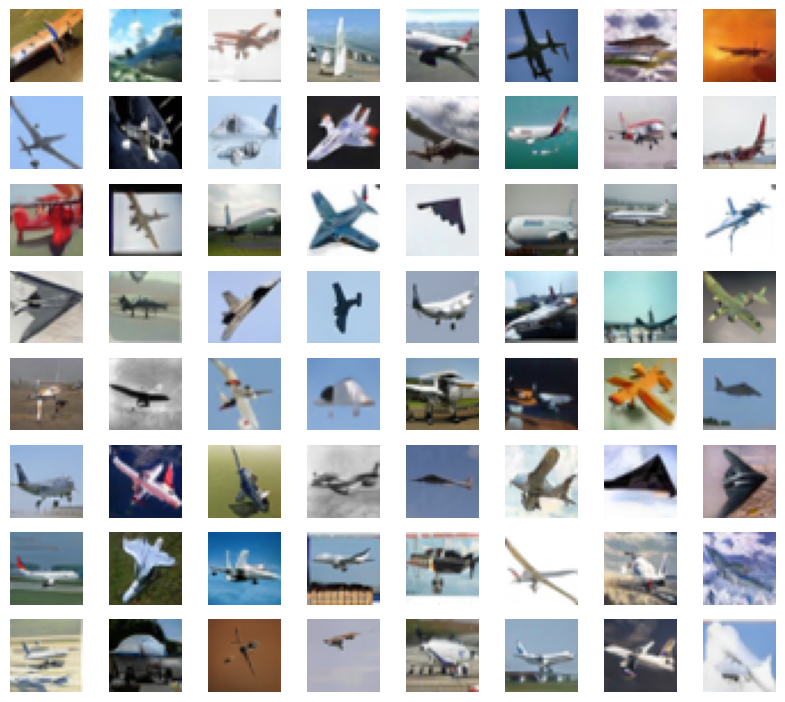

In [22]:
images = []
for img_path in glob.glob('out_cifar/*.png'):
    images.append(mpimg.imread(img_path))

plt.figure(figsize=(10,10))
columns = 8
for i, image in enumerate(images):
    plt.subplot(int(len(images) / columns + 1), columns, i + 1)
    plt.axis('off')
    plt.imshow(image)

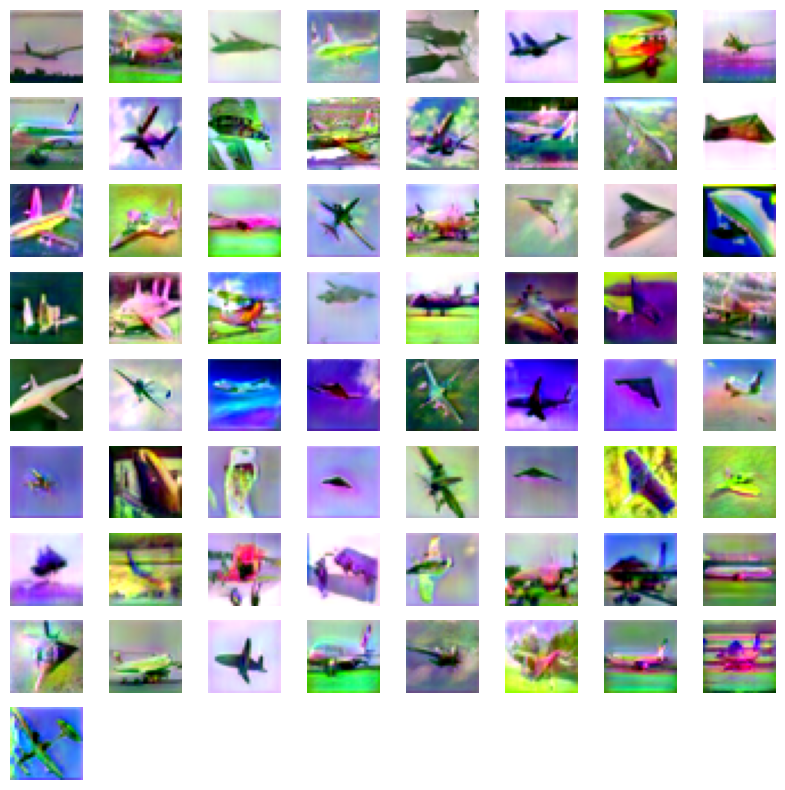

In [38]:
images = []
for img_path in glob.glob('out_cifar_our/*.png'):
    images.append(mpimg.imread(img_path))

plt.figure(figsize=(10,10))
columns = 8
for i, image in enumerate(images):
    plt.subplot(int(len(images) / columns + 1), columns, i + 1)
    plt.axis('off')
    plt.imshow(image)

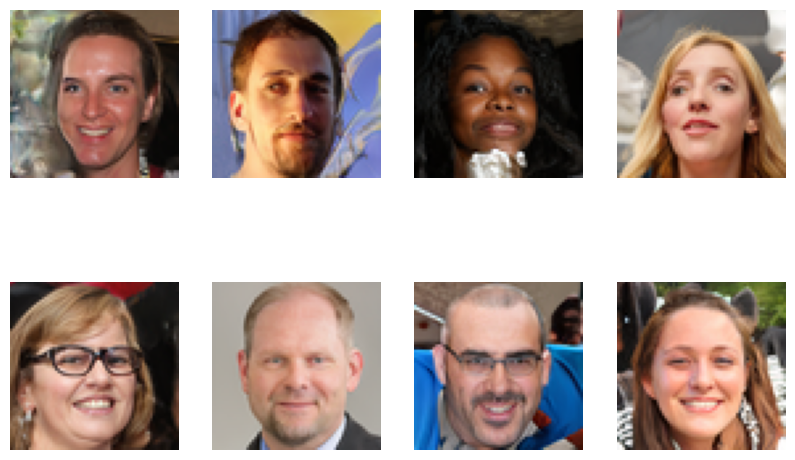

In [26]:
images = []
for img_path in glob.glob('out_ffhq/*.png'):
    images.append(mpimg.imread(img_path))

plt.figure(figsize=(10,10))
columns = 4
for i, image in enumerate(images):
    plt.subplot(int(len(images) / columns + 1), columns, i + 1)
    plt.axis('off')
    plt.imshow(image)

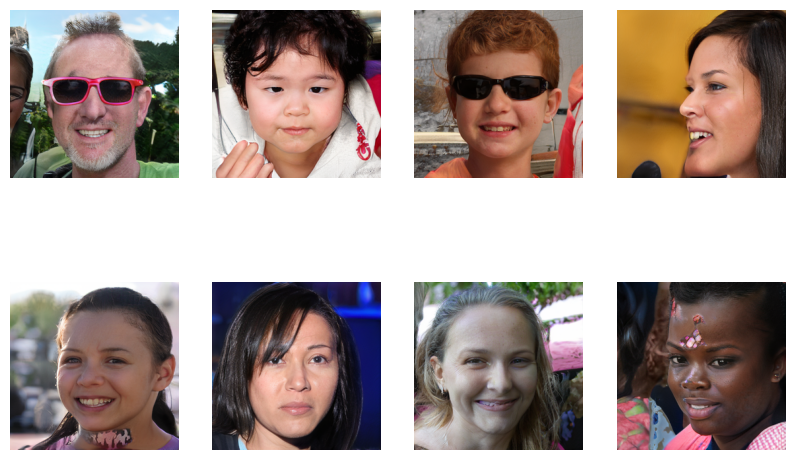

In [27]:
images = []
for img_path in glob.glob('out_ffhq_256/*.png'):
    images.append(mpimg.imread(img_path))

plt.figure(figsize=(10,10))
columns = 4
for i, image in enumerate(images):
    plt.subplot(int(len(images) / columns + 1), columns, i + 1)
    plt.axis('off')
    plt.imshow(image)

# Latent space exploration

In [ ]:
network_pkls = [
    'ProjectR3GAN/cifar10.pkl',
    'ProjectR3GAN/ffhq-64x64.pkl',
    'ProjectR3GAN/ffhq-256x256.pkl',
]
network_pkl = network_pkls[0]

In [20]:
!python ProjectR3GAN/interpolate_model.py --outdir=int_cifar --network="ProjectR3GAN/cifar10.pkl"

Setting up PyTorch plugin "bias_act_plugin"... /usr/local/lib/python3.11/dist-packages/torch/utils/cpp_extension.py:2059: UserWarning: TORCH_CUDA_ARCH_LIST is not set, all archs for visible cards are included for compilation. 
If this is not desired, please set os.environ['TORCH_CUDA_ARCH_LIST'].
  warnings.warn(
Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... /usr/local/lib/python3.11/dist-packages/torch/utils/cpp_extension.py:2059: UserWarning: TORCH_CUDA_ARCH_LIST is not set, all archs for visible cards are included for compilation. 
If this is not desired, please set os.environ['TORCH_CUDA_ARCH_LIST'].
  warnings.warn(
Done.


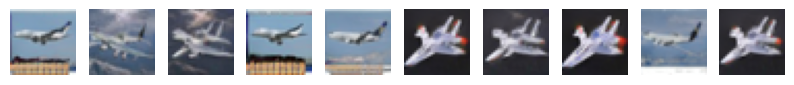

In [21]:
images = []
for img_path in glob.glob('int_cifar/*.png'):
    images.append(mpimg.imread(img_path))

plt.figure(figsize=(10,10))
columns = 10
for i, image in enumerate(images):
    plt.subplot(int(len(images) / columns + 1), columns, i + 1)
    plt.axis('off')
    plt.imshow(image)

In [34]:
!python ProjectR3GAN/interpolate_model.py --outdir=int_cifar_our --network="cifar10_our.pkl"

Setting up PyTorch plugin "bias_act_plugin"... /usr/local/lib/python3.11/dist-packages/torch/utils/cpp_extension.py:2059: UserWarning: TORCH_CUDA_ARCH_LIST is not set, all archs for visible cards are included for compilation. 
If this is not desired, please set os.environ['TORCH_CUDA_ARCH_LIST'].
  warnings.warn(
Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... /usr/local/lib/python3.11/dist-packages/torch/utils/cpp_extension.py:2059: UserWarning: TORCH_CUDA_ARCH_LIST is not set, all archs for visible cards are included for compilation. 
If this is not desired, please set os.environ['TORCH_CUDA_ARCH_LIST'].
  warnings.warn(
Done.


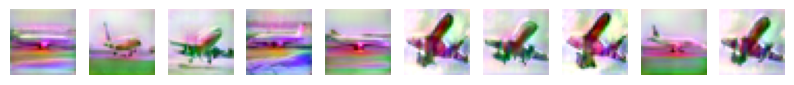

In [35]:
images = []
for img_path in glob.glob('int_cifar_our/*.png'):
    images.append(mpimg.imread(img_path))

plt.figure(figsize=(10,10))
columns = 10
for i, image in enumerate(images):
    plt.subplot(int(len(images) / columns + 1), columns, i + 1)
    plt.axis('off')
    plt.imshow(image)

In [22]:
!python ProjectR3GAN/interpolate_model.py --outdir=int_ffhq --network="ProjectR3GAN/ffhq-64x64.pkl"

warn: --class=lbl ignored when running on an unconditional network
Setting up PyTorch plugin "bias_act_plugin"... /usr/local/lib/python3.11/dist-packages/torch/utils/cpp_extension.py:2059: UserWarning: TORCH_CUDA_ARCH_LIST is not set, all archs for visible cards are included for compilation. 
If this is not desired, please set os.environ['TORCH_CUDA_ARCH_LIST'].
  warnings.warn(
Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... /usr/local/lib/python3.11/dist-packages/torch/utils/cpp_extension.py:2059: UserWarning: TORCH_CUDA_ARCH_LIST is not set, all archs for visible cards are included for compilation. 
If this is not desired, please set os.environ['TORCH_CUDA_ARCH_LIST'].
  warnings.warn(
Done.


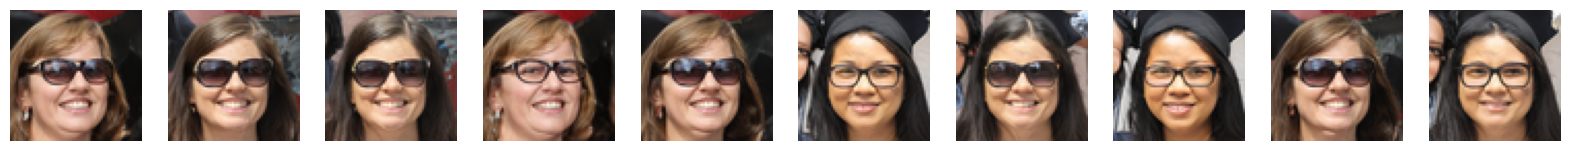

In [30]:
images = []
for img_path in glob.glob('int_ffhq/*.png'):
    images.append(mpimg.imread(img_path))

plt.figure(figsize=(20,10))
columns = 10
for i, image in enumerate(images):
    plt.subplot(int(len(images) / columns + 1), columns, i + 1)
    plt.axis('off')
    plt.imshow(image)

In [27]:
!python ProjectR3GAN/interpolate_model.py --outdir=int_ffhq256 --network="ProjectR3GAN/ffhq-256x256.pkl"

warn: --class=lbl ignored when running on an unconditional network
Setting up PyTorch plugin "bias_act_plugin"... /usr/local/lib/python3.11/dist-packages/torch/utils/cpp_extension.py:2059: UserWarning: TORCH_CUDA_ARCH_LIST is not set, all archs for visible cards are included for compilation. 
If this is not desired, please set os.environ['TORCH_CUDA_ARCH_LIST'].
  warnings.warn(
Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... /usr/local/lib/python3.11/dist-packages/torch/utils/cpp_extension.py:2059: UserWarning: TORCH_CUDA_ARCH_LIST is not set, all archs for visible cards are included for compilation. 
If this is not desired, please set os.environ['TORCH_CUDA_ARCH_LIST'].
  warnings.warn(
Done.


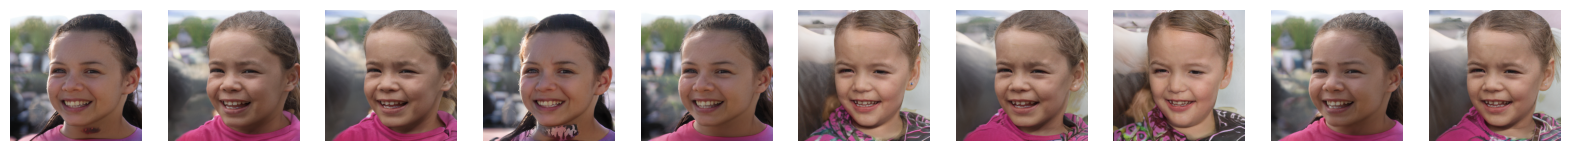

In [29]:
images = []
for img_path in glob.glob('int_ffhq256/*.png'):
    images.append(mpimg.imread(img_path))

plt.figure(figsize=(20,10))
columns = 10
for i, image in enumerate(images):
    plt.subplot(int(len(images) / columns + 1), columns, i + 1)
    plt.axis('off')
    plt.imshow(image)

# Training flow

In [ ]:
!python R3GAN/train.py --outdir=./training-runs --data="./datasets/cifar-10.zip" --gpus=1 --batch=32 --mirror=1 --aug=1 --cond=0 --preset="CIFAR10" --tick=1 --snap=200


Training options:
{
  "G_kwargs": {
    "class_name": "training.networks.Generator",
    "NoiseDimension": 64,
    "WidthPerStage": [
      768,
      768,
      768,
      768
    ],
    "CardinalityPerStage": [
      96,
      96,
      96,
      96
    ],
    "BlocksPerStage": [
      2,
      2,
      2,
      2
    ],
    "ExpansionFactor": 2,
    "FP16Stages": [
      -1,
      -2,
      -3
    ]
  },
  "D_kwargs": {
    "class_name": "training.networks.Discriminator",
    "WidthPerStage": [
      768,
      768,
      768,
      768
    ],
    "CardinalityPerStage": [
      96,
      96,
      96,
      96
    ],
    "BlocksPerStage": [
      2,
      2,
      2,
      2
    ],
    "ExpansionFactor": 2,
    "FP16Stages": [
      2,
      1,
      0
    ]
  },
  "G_opt_kwargs": {
    "class_name": "torch.optim.Adam",
    "betas": [
      0,
      0
    ],
    "eps": 1e-08
  },
  "D_opt_kwargs": {
    "class_name": "torch.optim.Adam",
    "betas": [
      0,
      0
    ],
    "e

In [ ]:
!python R3GAN/train.py --outdir=./training-runs --data=./datasets/ffhq-64x64.zip --gpus=8 --batch=256 --mirror=1 --aug=1 --preset="FFHQ-64" --tick=1 --snap=200

In [ ]:
!python R3GAN/train.py --outdir=./training-runs --data=./datasets/ffhq-256x256.zip --gpus=8 --batch=256 --mirror=1 --aug=1 --preset="FFHQ-256" --tick=1 --snap=200